In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks
from scipy.interpolate import make_interp_spline
from mpl_toolkits.mplot3d import Axes3D
import itertools
import os

In [ ]:
'''Fungsi Interpolasi data'''

def interpolasi(min, max, i, xval, yval, delta):
    xnew = np.linspace(min, max, delta)
    spline = make_interp_spline(xval, yval, k=i)
    ynew = spline(xnew)
    return xnew, ynew

In [ ]:
'''
Data tersedia online di drive dengan link:
https://drive.google.com/drive/folders/1ecnmIf7UM5puaVKm5ocQqS8JDodC1tbH?usp=sharing
'''

!gdown --folder --id 1ecnmIf7UM5puaVKm5ocQqS8JDodC1tbH -O /
os.chdir('/RTDs temperature variation data')

os.listdir()

/usr/local/lib/python3.11/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Retrieving folder contents
Processing file 1xga_TsjseFIEESV_YHRYR7kyrcs0TMkP data_LB1.5_T77.npz
Processing file 1JCSlEhfnJfTcURJecIwew1ydlc29qCuG data_LB1.5_T126.npz
Processing file 1OCdS8GdNQkxHsqHH_w7dF1CwmpfamMJ8 data_LB1.5_T175.npz
Processing file 127-zVz3PvWAo8fUImBEM1yP5CwKJ_dL2 data_LB1.5_T224.npz
Processing file 1EQi1bkGjmqqF0rqj3c5kiU-dAYWlhqVR data_LB1.5_T273.npz
Processing file 1h3grULV6vE4GN5SGOdpofhS3_Ru_056l data_LB1.5_T300.npz
Processing file 1DyxgQ_85auFhScBuF8p4iVQwnD5ojP4J data_LB1.5_T323.npz
Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From: https://drive.google.com/uc?id=1xga_TsjseFIEESV_YHRYR7kyrcs0TMkP
To: /RTDs temperature variation data/data_LB1.5_T77.npz
100% 2.75M/2.75M

['data_LB1.5_T224.npz',
 'data_LB1.5_T4.npz',
 'data_LB1.5_T273.npz',
 'data_LB1.5_T323.npz',
 'data_LB1.5_T126.npz',
 'data_LB1.5_T300.npz',
 'data_LB1.5_T77.npz',
 'data_LB1.5_T175.npz',
 '.ipynb_checkpoints']

In [ ]:
# Load data dari file npz
LebarPenghalang = [1.5]
Temperature = [77, 126, 175, 224, 273, 300, 323]

'''
Load data dari file npz dengan nama yang sesuai dengan parameter yang digunakan
Penamaan Hasil Load Data Mengacu Sebagai Berikut:
x_LB1_5_T300 : array posisi x untuk Lebar Penghalang 1.5 nm dan Temperatur 300 K
J_LB2_T300 : array kerapatan arus untuk Lebar Penghalang 2 nm dan Temperatur 300 K
dan seterusnya....
'''

for i in LebarPenghalang:
  for T in Temperature:
    filename = f"data_LB{i}_T{T}.npz"
    data = np.load(filename)
    variable = {f"{var}_LB{str(i).replace('.', '_')}_T{T}": data[var] for var in ['x', 'Vbias', 'E', 'Ef', 'pot', 'nilai_transmisi', 'J']}
    globals().update(variable)

#Variabel yang sama
Ti = 300
Vbias   = eval(f'Vbias_LB1_5_T{Ti}')

#Profil Potensial dan Koefisien Transmisi Elektron

In [ ]:
'''Tebakan bias yang ingin diplot'''
biasplot   = 0.12
n          = np.argmin(np.abs(Vbias - biasplot))
Vplot      = Vbias[n]
biasplot2  = 0.24
n2         = np.argmin(np.abs(Vbias - biasplot2))
Vplot2     = Vbias[n2]
biasplot3  = 0.48
n3         = np.argmin(np.abs(Vbias - biasplot3))
Vplot3     = Vbias[n3]

LebarPenghalangplot = [1.5]
Tplot               = Temperature

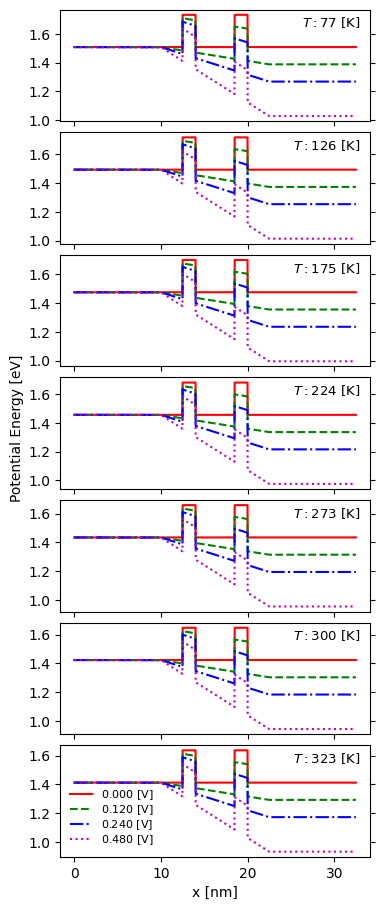

In [ ]:
'''Plot bentuk potensial yang digunakan'''

fig, axes = plt.subplots(len(Tplot), 1, sharex=True, figsize=(4, 11))
fig.subplots_adjust(hspace=0.1)  #jarak antar subplot

for (ax, T) in zip(axes, Tplot):
  for i in LebarPenghalangplot:
    xi       = eval(f'x_LB{str(i).replace(".", "_")}_T{T}')
    pot_0    = eval(f'pot_LB{str(i).replace(".", "_")}_T{T}')[0]
    pot_i    = eval(f'pot_LB{str(i).replace(".", "_")}_T{T}')[n]
    pot_j    = eval(f'pot_LB{str(i).replace(".", "_")}_T{T}')[n2]
    pot_k    = eval(f'pot_LB{str(i).replace(".", "_")}_T{T}')[n3]

    ax.plot(xi, pot_0, color='r', linestyle='-', label=f'$0.000$ [V]')
    ax.plot(xi, pot_i, color='g', linestyle='--', label=f'${Vplot:.3f}$ [V]')
    ax.plot(xi, pot_j, color='b', linestyle='-.', label=f'${Vplot2:.3f}$ [V]')
    ax.plot(xi, pot_k, color='m', linestyle=':', label=f'${Vplot3:.3f}$ [V]')

    ax.text(0.97, 0.95, f"$T : {T}$ [K]", fontsize=9.5, ha='right', va='top',
            transform=ax.transAxes)
    ax.tick_params(right=True, which='both')
    #ax.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)

#Label sumbu
axes[-1].set_xlabel('x [nm]')
fig.text(0, 0.5, 'Potential Energy [eV]', va='center', rotation='vertical')

plt.legend(labelspacing=0.1, fontsize=8, frameon=False)
plt.show()


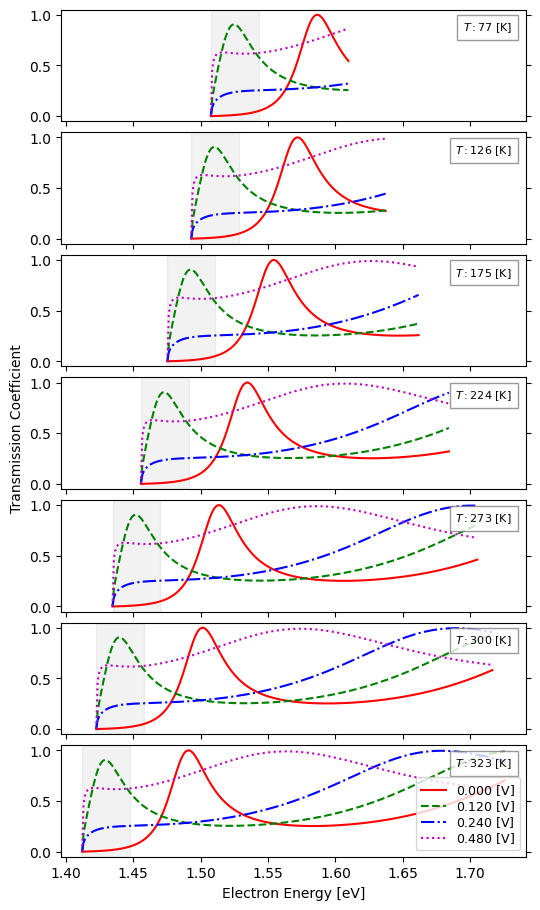

In [ ]:
'''Plot koefisien transmisi'''

fig, axes = plt.subplots(len(Tplot), 1, sharex=True, figsize=(6, 11))
fig.subplots_adjust(hspace=0.1)  #jarak antar subplot

Fermi = []
energi_min = []

for (ax, T) in zip(axes, Tplot):
  for i in LebarPenghalangplot:
    Tr_0    = eval(f'nilai_transmisi_LB{str(i).replace(".", "_")}_T{T}')[0]
    Tr_1    = eval(f'nilai_transmisi_LB{str(i).replace(".", "_")}_T{T}')[n]
    Tr_2    = eval(f'nilai_transmisi_LB{str(i).replace(".", "_")}_T{T}')[n2]
    Tr_3    = eval(f'nilai_transmisi_LB{str(i).replace(".", "_")}_T{T}')[n3]
    Energi  = eval(f'E_LB{str(i).replace(".", "_")}_T{T}')
    Ef      = eval(f'Ef_LB{str(i).replace(".", "_")}_T{T}')

    Fermi.append(Ef)
    energi_min.append(Energi[0])

    ax.axvspan(Energi[0], Ef, color='gray', alpha=0.1)
    ax.plot(Energi, Tr_0, color='r', linestyle='-', label=f'$0.000$ [V]')
    ax.plot(Energi, Tr_1, color='g', linestyle='--', label=f'${Vplot:.3f}$ [V]')
    ax.plot(Energi, Tr_2, color='b', linestyle='-.', label=f'${Vplot2:.3f}$ [V]')
    ax.plot(Energi, Tr_3, color='m', linestyle=':', label=f'${Vplot3:.3f}$ [V]')

    ax.text(0.97, 0.9, f"$T : {T}$ [K]", fontsize=8, ha='right', va='top',
            transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=0.8, edgecolor='gray'))
    ax.tick_params(right=True, which='both')
   #ax.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)

axes[-1].set_xlabel('Electron Energy [eV]')
fig.text(0.04, 0.5, 'Transmission Coefficient', va='center', rotation='vertical')

plt.legend(labelspacing=0.1, fontsize=9, loc='lower right')
plt.show()


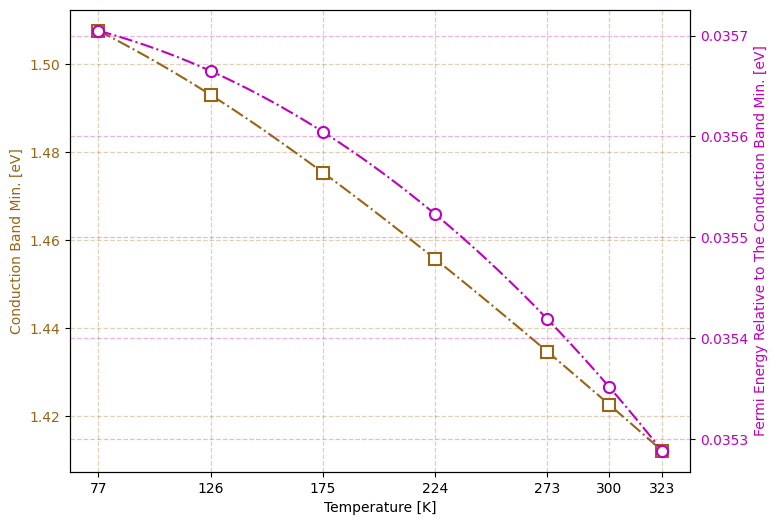

In [ ]:
'''Pengaruh Suhu Terhadap Energi Fermi'''

fig, ax1 = plt.subplots(figsize=(8, 6))

color = '#996515'
ax1.set_xlabel('Temperature [K]')
ax1.set_xticks(Tplot)
ax1.set_ylabel('Conduction Band Min. [eV]', color=color)

xp_1, yp_1 = interpolasi(min(Temperature), max(Temperature), 2, Temperature, energi_min, 50)
ax1.plot(xp_1, yp_1, color=color, linestyle='-.')
ax1.plot(Temperature, energi_min, linestyle='None', marker='s', markersize=8, markerfacecolor='w', markeredgecolor=color, markeredgewidth=1.5)

#ax.plot(xnew, ynew, color=warna, linestyle=garis)
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.grid(True, linestyle='--', linewidth=0.9, alpha=0.3, color=color)

ax2 = ax1.twinx()
color = 'm'
ax2.set_ylabel('Fermi Energy Relative to The Conduction Band Min. [eV]', color=color)

Fermi = np.array(Fermi) - np.array(energi_min)
xp_1, yp_1 = interpolasi(min(Temperature), max(Temperature), 3, Temperature, Fermi, 50)
ax2.plot(xp_1, yp_1, color=color, linestyle='-.')
ax2.plot(Temperature, Fermi, linestyle='None', marker='o', markersize=8, markerfacecolor='w', markeredgecolor=color, markeredgewidth=1.5)

ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True, linestyle='--', linewidth=0.9, alpha=0.3, color=color)

plt.show()


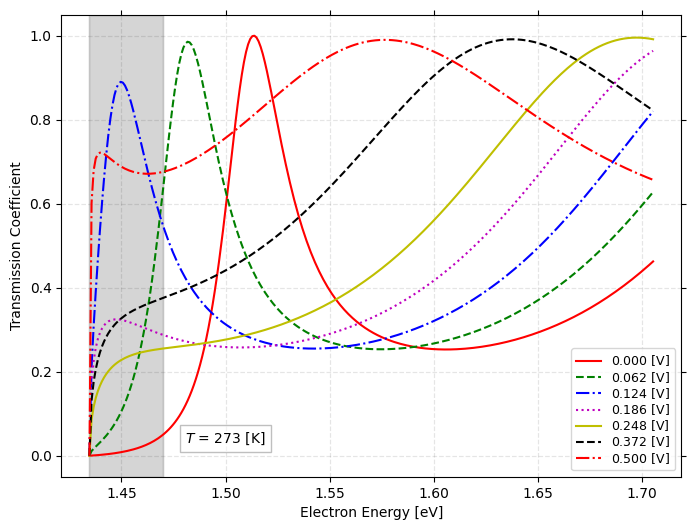

In [ ]:
colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'k'])
linestyles = itertools.cycle(['-', '--', '-.', ':'])

plt.figure(figsize=(8, 6))
biasx = [0, 0.062, 0.124, 0.186, 0.248, 0.372, 0.5]
Tx = [273]
for i in LebarPenghalangplot:
  for T in Tx:
    for V in biasx:
      E_x = eval(f'E_LB{str(i).replace(".", "_")}_T{T}')
      Ef  = eval(f'Ef_LB{str(i).replace(".", "_")}_T{T}')
      Tr_x = eval(f'nilai_transmisi_LB{str(i).replace(".", "_")}_T{T}')[np.argmin(np.abs(Vbias - V))]
      plt.plot(E_x, Tr_x, color=next(colors), linestyle=next(linestyles), label=f'${Vbias[np.argmin(np.abs(Vbias-V))]:.3f}$ [V]')
      plt.axvspan(E_x[0], Ef, color='gray', alpha=0.05)

plt.xlabel("Electron Energy [eV]")
plt.ylabel(f"Transmission Coefficient")

ax = plt.gca()
ax.tick_params(top=True, right=True, which='both')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)
plt.legend(labelspacing=0.1, loc = 'lower right', fontsize=9)
plt.text(0.2, 0.1, f'$T$ = 273 [K]',
         transform=plt.gca().transAxes, verticalalignment='top', color='k',
         bbox=dict(facecolor='white', alpha=0.5, edgecolor='gray'))

plt.show()

#J-V Characteristics

In [ ]:
LebarPenghalang_JV = LebarPenghalang
T_JV               = Temperature

In [ ]:
'''Interpolasi Karakteristik J-V agar ditemukan puncak dan lembah yang lebih akurat'''

'''
Terdapat cukup banyak metode untuk menemukan J puncak dan J lembah pada karakteristik J-V.
1. Generate lansung data hasil TMM, dimana ketelitian tegangan bias maksimum yang dihasilkan dalam penelitian ini adalah 0.002 Volt
2. Generate data hasil TMM, kemudian melakukan diskretisasi bias lebih kecil pada daerah J puncak dan J lembah berbasis perhitungan TMM langsung.
   Ketelitian yang dihasilkan tergantung diskretisasi bias tersebut.
3. Generate data hasil TMM, kemudian menggunakan metode Golden Section dengan berbasis perhitungan TMM langsung untuk menemukan J puncak dan J lembah.
   Ketelitian yang dihasilkan tergantung banyak iterasi yang diinginkan.
4. Generate data hasil TMM, kemudian menggunakan interpolasi agar diskretisasi bias semakin halus.
   Ketelitian yang dihasilkan tergantung hasil interpolasi dan besarnya diskretisasi bias.
'''

#Nilai Vbias untuk interpolasi
dV_int    = 1e-6
Vbias_int0 = np.arange(0, 0.1, 1e-3)
Vbias_int1 = np.arange(0.1, 0.3, dV_int)
Vbias_int2 = np.arange(0.3, 0.5+1e-8, 1e-3)
Vbias_int = np.concatenate((Vbias_int0, Vbias_int1, Vbias_int2))

#Nilai J interpolasi
J_int = []
for i in LebarPenghalang_JV:
  for T in T_JV:
    J_val = eval(f'J_LB{str(i).replace(".", "_")}_T{T}')
    J_val = J_val/1e6/1e3                                     #Ubah satuan dalam kA/cm2 (Umumnya)
    f     = make_interp_spline(Vbias, J_val, k=3)
    J_int.append(f(Vbias_int))


'''Semua nilai J setelah code ini memiliki satuan kA/cm2'''

'Semua nilai J setelah code ini memiliki satuan kA/cm2'

In [ ]:
'''Mencari Ip, Iv, Vp, dan Vv pada karakteristik J-V hasil interpolasi'''

peak   = []   #isinya (Vp, Ip) dengan urutan sesuai [Tplot]
valley = []   #isinya (Vv, Iv) dengan urutan sesuai [Tplot]

#Deteksi arus puncak dan arus lembah
for i in LebarPenghalang_JV:
  for T in T_JV:
      J_i      = J_int[T_JV.index(T)]   #Hasil interpolasi

      #Filter data sampai batas tegangan
      batas_tegangan = 0.16     #tebakan
      mask           = Vbias_int < batas_tegangan
      J_mask         = J_i[mask]
      Vb_mask        = Vbias_int[mask]

      indekspuncak   = np.argmax(J_mask)
      J_max          = J_i[indekspuncak]
      Vbias_J_max    = Vbias_int[indekspuncak]

      #Cari lembah setelah puncak di data penuh
      indekslembah   = np.argmin(J_i[indekspuncak:]) + indekspuncak
      J_min          = J_i[indekslembah]
      Vbias_J_min    = Vbias_int[indekslembah]

      peak.extend(np.column_stack((Vbias_J_max, J_max)))
      valley.extend(np.column_stack((Vbias_J_min, J_min)))

peak    = np.array(peak)
valley  = np.array(valley)

#Menghitung Selisih Kerapatan Arus dan Tegangan
peak_LB   = [peak[i:i+1] for i in range(0, len(peak), 1)]
valley_LB = [valley[i:i+1] for i in range(0, len(valley), 1)]
Delta_J   = [p[0][1] - v[0][1] for p, v in zip(peak_LB, valley_LB)]
Delta_V   = [v[0][0] - p[0][0] for p, v in zip(peak_LB, valley_LB)]

#Menghitung Daya RF Maksimum Per-Luas
P_RF_max = [3/16 * Delta_J[i] * Delta_V[i] for i in range(len(Delta_J))]

#Menghitung Peak-to-valley-ratio (PVR)
PVR       = [p[0][1] / v[0][1] for p, v in zip(peak_LB, valley_LB)]

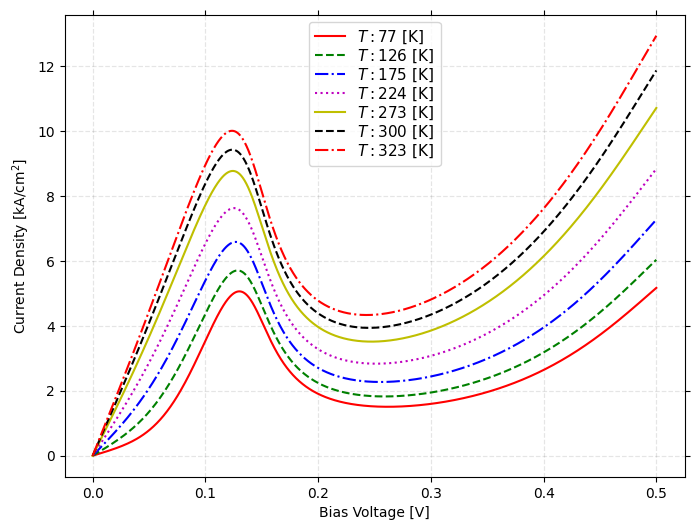

In [ ]:
'''Plot J-V Characteristics'''

colors = itertools.cycle(['r', 'g', 'b', 'm', 'y', 'k'])
linestyles = itertools.cycle(['-', '--', '-.', ':'])

plt.figure(figsize=(8, 6))

for i in LebarPenghalang_JV:
  for T in T_JV:
    J_i = J_int[T_JV.index(T)]
    plt.plot(Vbias_int, J_i, color=next(colors), linestyle=next(linestyles), label=f'$T : {T}$ [K]')

#plt.scatter(peak[:, 0], peak[:, 1], marker='s', s=40, c='w', ec='k', label='Peak')
#plt.scatter(valley[:, 0], valley[:, 1], marker='o', s=40, c="w", ec="k", label='Valley')

#plt.title("J-V Characteristics of Double-Barrier RTDs", fontsize=10)
plt.xlabel("Bias Voltage [V]")
plt.ylabel(f"Current Density [kA/cm$^2$]")
#plt.ticklabel_format(axis='y', style='sci', scilimits=(0,0))

ax = plt.gca()
ax.tick_params(top=True, right=True, which='both')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)
plt.legend(labelspacing=0.1, loc = 'upper center', fontsize=11)

plt.show()

In [ ]:
import pandas as pd

column_order = ['T', 'Vp', 'Jp']
column_order_valley = ['T', 'Vv', 'Jv']

df_peak = pd.DataFrame(peak, columns=['Vp', 'Jp']).assign(T=T_JV)[column_order]
df_valley = pd.DataFrame(valley, columns=['Vv', 'Jv']).assign(T=T_JV)[column_order_valley]

display(df_peak)
display(df_valley)

data = {'T': T_JV, 'PCVR' : PVR,'dJ': Delta_J, 'dV': Delta_V, 'Power RF (unit Area)': P_RF_max}
df = pd.DataFrame(data)

# Menampilkan tabel
display(df)

,T,Vp,Jp
0,77,0.130104,5.063443
1,126,0.128552,5.706863
2,175,0.126886,6.587007
3,224,0.125415,7.628399
4,273,0.124312,8.773190
5,300,0.123884,9.428006
6,323,0.123619,10.010081


,T,Vv,Jv
0,77,0.261794,1.508003
1,126,0.258823,1.826041
2,175,0.255279,2.271837
3,224,0.251397,2.835073
4,273,0.247299,3.514900
5,300,0.244973,3.938841
6,323,0.242961,4.335210


,T,PCVR,dJ,dV,Power RF (unit Area)
0,77,3.357714,3.555440,0.131690,0.087790
1,126,3.125265,3.880822,0.130271,0.094792
2,175,2.899419,4.315170,0.128393,0.103882
3,224,2.690724,4.793326,0.125982,0.113226
4,273,2.496000,5.258290,0.122987,0.121257
5,300,2.393599,5.489165,0.121089,0.124627
6,323,2.309019,5.674871,0.119342,0.126984


In [ ]:
from google.colab import files
df_peak.to_excel('output_peak.xlsx', index=False)
#files.download('output_peak.xlsx')
df_valley.to_excel('output_valley.xlsx', index=False)
#files.download('output_valley.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#PVCR


In [ ]:
from sklearn.metrics import r2_score

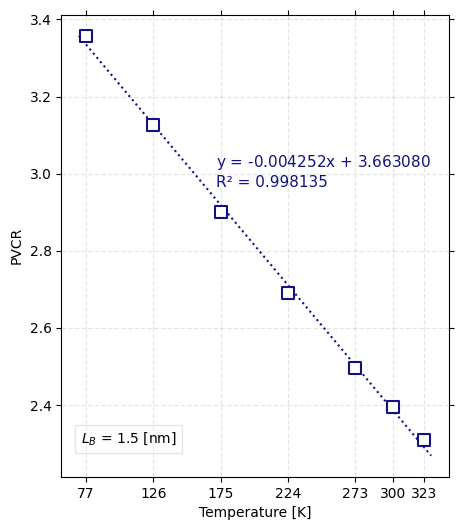

In [ ]:
'''Peak-to-valley-current-ratio'''

plt.figure(figsize=(5, 6))

warna = '#111184'
plt.scatter(T_JV, PVR, marker='s', s=70, c='w', ec=warna, lw=1.5, zorder=3)

#Trendline
slope, intercept = np.polyfit(T_JV, PVR, 1)
reg = slope*np.array(T_JV) + intercept
r_squared = r2_score(PVR, reg)
xp_1 = np.linspace(min(T_JV)-5, max(T_JV)+5, 50)
yp_1 = slope*xp_1 + intercept
plt.plot(xp_1, yp_1, color=warna, linestyle=':')
plt.text(0.4, 0.7, f'y = {slope:.6f}x $\plus$ {intercept:.6f}\nR² = {r_squared:.6f}',
         transform=plt.gca().transAxes, verticalalignment='top', color=warna,
         fontsize=11)

plt.xlabel('Temperature [K]')
plt.ylabel('PVCR')
#plt.title('Peak-to-valley-current-ratio', fontsize=10)

ax = plt.gca()
ax.tick_params(top=True, right=True, which='both')
plt.text(0.05, 0.1, f'$L_B$ = 1.5 [nm]',
         transform=plt.gca().transAxes, verticalalignment='top', color='k',
         bbox=dict(facecolor='white', alpha=0.2, edgecolor='gray'))
plt.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)
plt.xticks(Temperature)

plt.show()

#Power RF

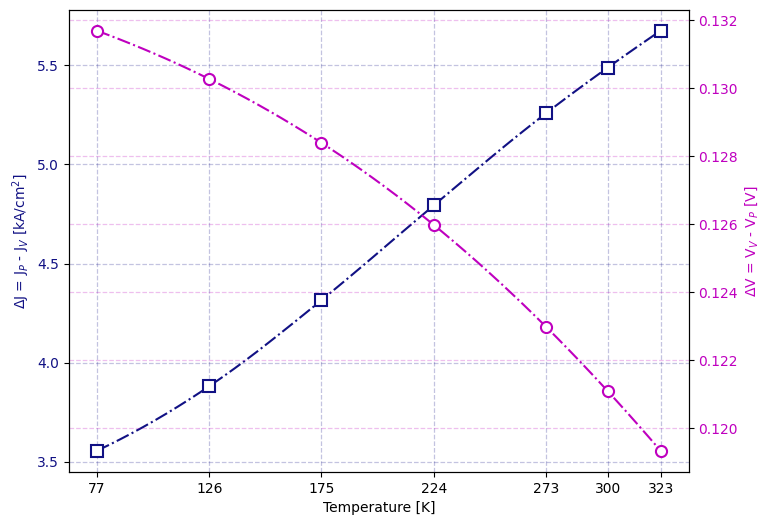

In [ ]:
'''Plot dJ dan dV'''

fig, ax1 = plt.subplots(figsize=(8, 6))

color = '#111184'
ax1.set_xlabel('Temperature [K]')
ax1.set_xticks(Tplot)
ax1.set_ylabel('$\Delta$J = J$_P$ - J$_V$ [kA/cm$^2$]', color=color)

xp_1, yp_1 = interpolasi(min(T_JV), max(T_JV), 2, T_JV, Delta_J, 50)
ax1.plot(xp_1, yp_1, color=color, linestyle='-.')
ax1.plot(T_JV, Delta_J, linestyle='None', marker='s', markersize=8, markerfacecolor='w', markeredgecolor=color, markeredgewidth=1.5)

#ax.plot(xnew, ynew, color=warna, linestyle=garis)
ax1.tick_params(axis='y', labelcolor=color)
ax1.ticklabel_format(axis='y', style='sci', scilimits=(0, 0))
ax1.grid(True, linestyle='--', linewidth=0.9, alpha=0.25, color=color)

ax2 = ax1.twinx()
color = 'm'
ax2.set_ylabel('$\Delta$V = V$_V$ - V$_P$ [V]', color=color)

xp_1, yp_1 = interpolasi(min(T_JV), max(T_JV), 3, T_JV, Delta_V, 50)
ax2.plot(xp_1, yp_1, color=color, linestyle='-.')
ax2.plot(T_JV, Delta_V, linestyle='None', marker='o', markersize=8, markerfacecolor='w', markeredgecolor=color, markeredgewidth=1.5)

ax2.tick_params(axis='y', labelcolor=color)
ax2.grid(True, linestyle='--', linewidth=0.9, alpha=0.25, color=color)
plt.xticks(Temperature)

#plt.title('$\Delta$J and $\Delta$V vs  Temperature', fontsize=10)
plt.show()


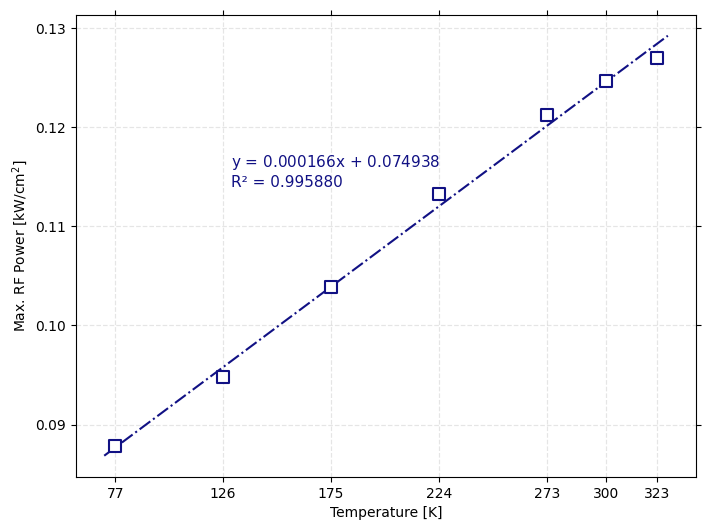

In [ ]:
'''Plot Max_RF Power'''

plt.figure(figsize=(8, 6))

#xp_1, yp_1 = interpolasi(min(T_JV), max(T_JV), 3, T_JV, P_RF_max, 50)
#plt.plot(xp_1, yp_1, color='#B03052', linestyle='-.')
plt.scatter(T_JV, P_RF_max, marker='s', s=70, c='w', ec=warna, lw=1.5, zorder=3)

#Trendline
slope, intercept = np.polyfit(T_JV, P_RF_max, 1)
reg = slope*np.array(T_JV) + intercept
r_squared = r2_score(P_RF_max, reg)
xp_1 = np.linspace(min(T_JV)-5, max(T_JV)+5, 50)
yp_1 = slope*xp_1 + intercept
plt.plot(xp_1, yp_1, color=warna, linestyle='-.')
plt.text(0.25, 0.7, f'y = {slope:.6f}x $\plus$ {intercept:.6f}\nR² = {r_squared:.6f}',
         transform=plt.gca().transAxes, verticalalignment='top', color=warna,
         fontsize=11)

plt.xlabel('Temperature [K]')
plt.ylabel(f'Max. RF Power [kW/cm$^2$]')
#plt.title('Maximum RF Power vs Temperature', fontsize=10)

ax = plt.gca()
ax.tick_params(top=True, right=True, which='both')
plt.grid(color = 'black', linestyle = '--', linewidth = 0.9, alpha = 0.1)
plt.xticks(Temperature)

plt.show()